In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import heapq

sns.set_palette("pastel", 9)
#husl

### Visualization functions

In [29]:
def count_compare_plot(df, column, compare_column, stat="count", rotation=0, order=None):
    plt.figure(figsize=(12,6))
    sns.countplot(df, x=df[column], hue = df[compare_column], palette='Greens_r', gap=0.05, 
                  stat=stat, order=order)
    plt.title('Income of Individuals of Different Age Groups')
    plt.xticks(rotation=rotation)
    plt.legend()
    plt.show()

In [30]:
file_path = 'adults_data\\adult_clean.csv'   #mamy tez csv
#file_path = 'path for karolcia'

In [31]:
column_names = ["age","workclass","fnlwgt", "education-num", "marital-status", "occupation", 
                "relationship", "race", "sex", "capital", "hours-per-week", "native-country", "income"]

df = pd.read_csv(file_path, delimiter=',', header=0, names=column_names)

n = len(df)
n_features = len(df.columns) - 2

df.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital,hours-per-week,native-country,income
0,31-40,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,40,United-States,<=50K
1,41-50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,13,United-States,<=50K
2,31-40,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,40,United-States,<=50K
3,51-60,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,40,United-States,<=50K
4,25-30,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,40,Middle America,<=50K


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  object 
 1   workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education-num   32561 non-null  int64  
 4   marital-status  32561 non-null  object 
 5   occupation      30718 non-null  object 
 6   relationship    32561 non-null  object 
 7   race            32561 non-null  object 
 8   sex             32561 non-null  object 
 9   capital         32402 non-null  float64
 10  hours-per-week  32561 non-null  int64  
 11  native-country  31864 non-null  object 
 12  income          32561 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 3.2+ MB


In [33]:
df.nunique()

age                   8
workclass             8
fnlwgt            21648
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital             209
hours-per-week       94
native-country       13
income                2
dtype: int64

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital,32402.0,504.499198,2611.892647,-4356.0,0.0,0.0,0.0,41310.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


## NaN visualization

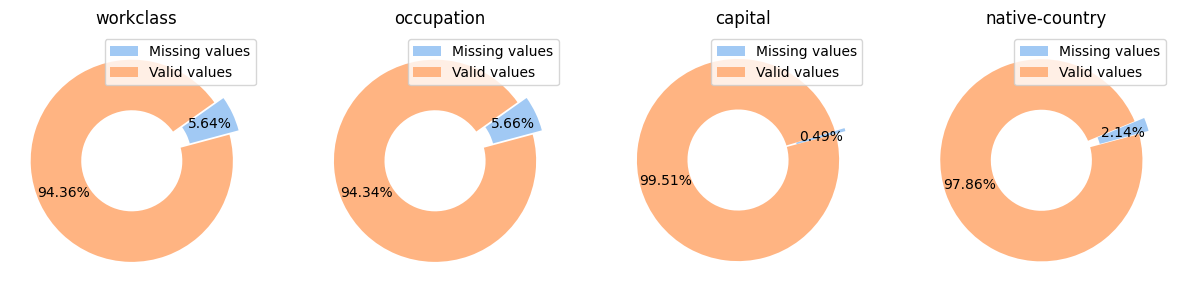

In [35]:
# Amount of missing values
df_missing_values = pd.DataFrame({"Missing values": df.isnull().sum(), "Valid values": df.notnull().sum()})
df_missing_values = df_missing_values[df_missing_values["Missing values"] > 0 ]
df_missing_values = df_missing_values.T



fig, axes = plt.subplots(1, len(df_missing_values.columns), figsize=(15, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(df_missing_values.columns):
    labels = ['Missing values', 'Valid values']
    ax = axes[i]
    ax.pie(df_missing_values[col], autopct='%1.2f%%', wedgeprops=dict(width=0.5), 
           startangle=15, explode=(0.05,0.05), shadow=False, pctdistance=0.75)
    ax.set_title(col)
    ax.legend(labels)

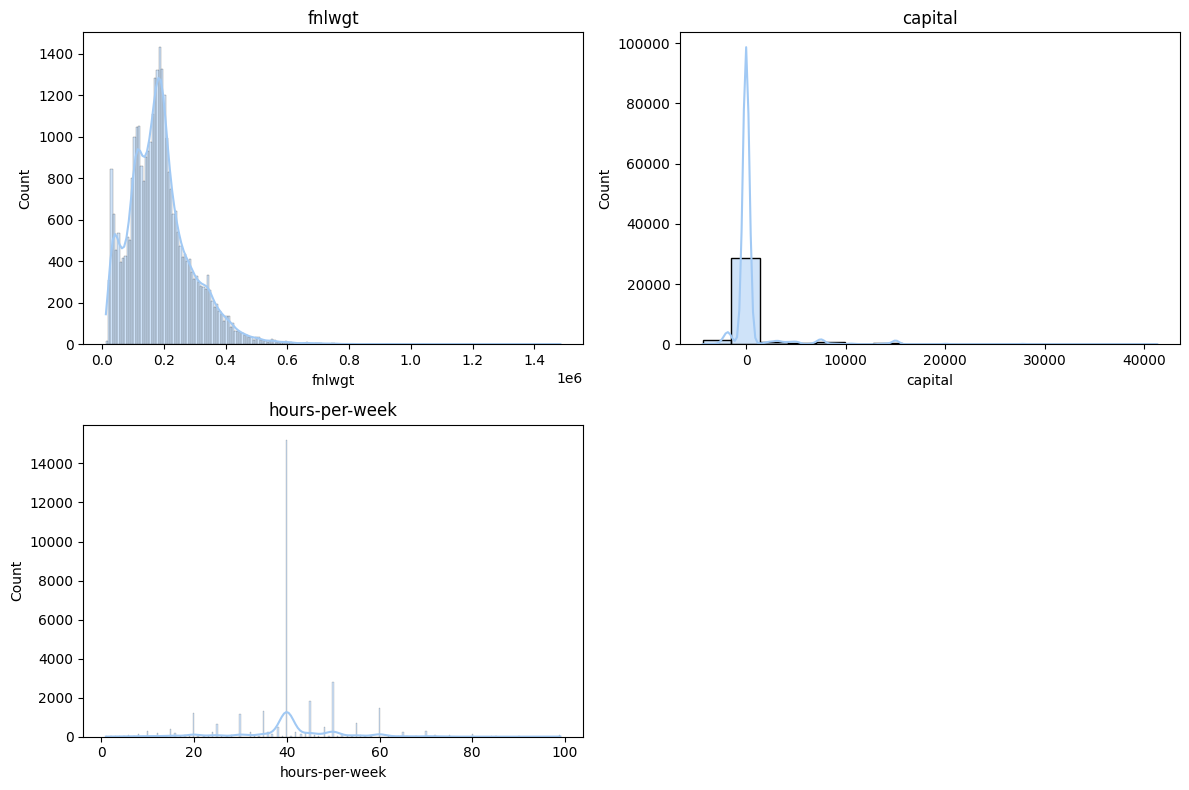

In [37]:
numerical_features = ['fnlwgt', 'capital', 'hours-per-week']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

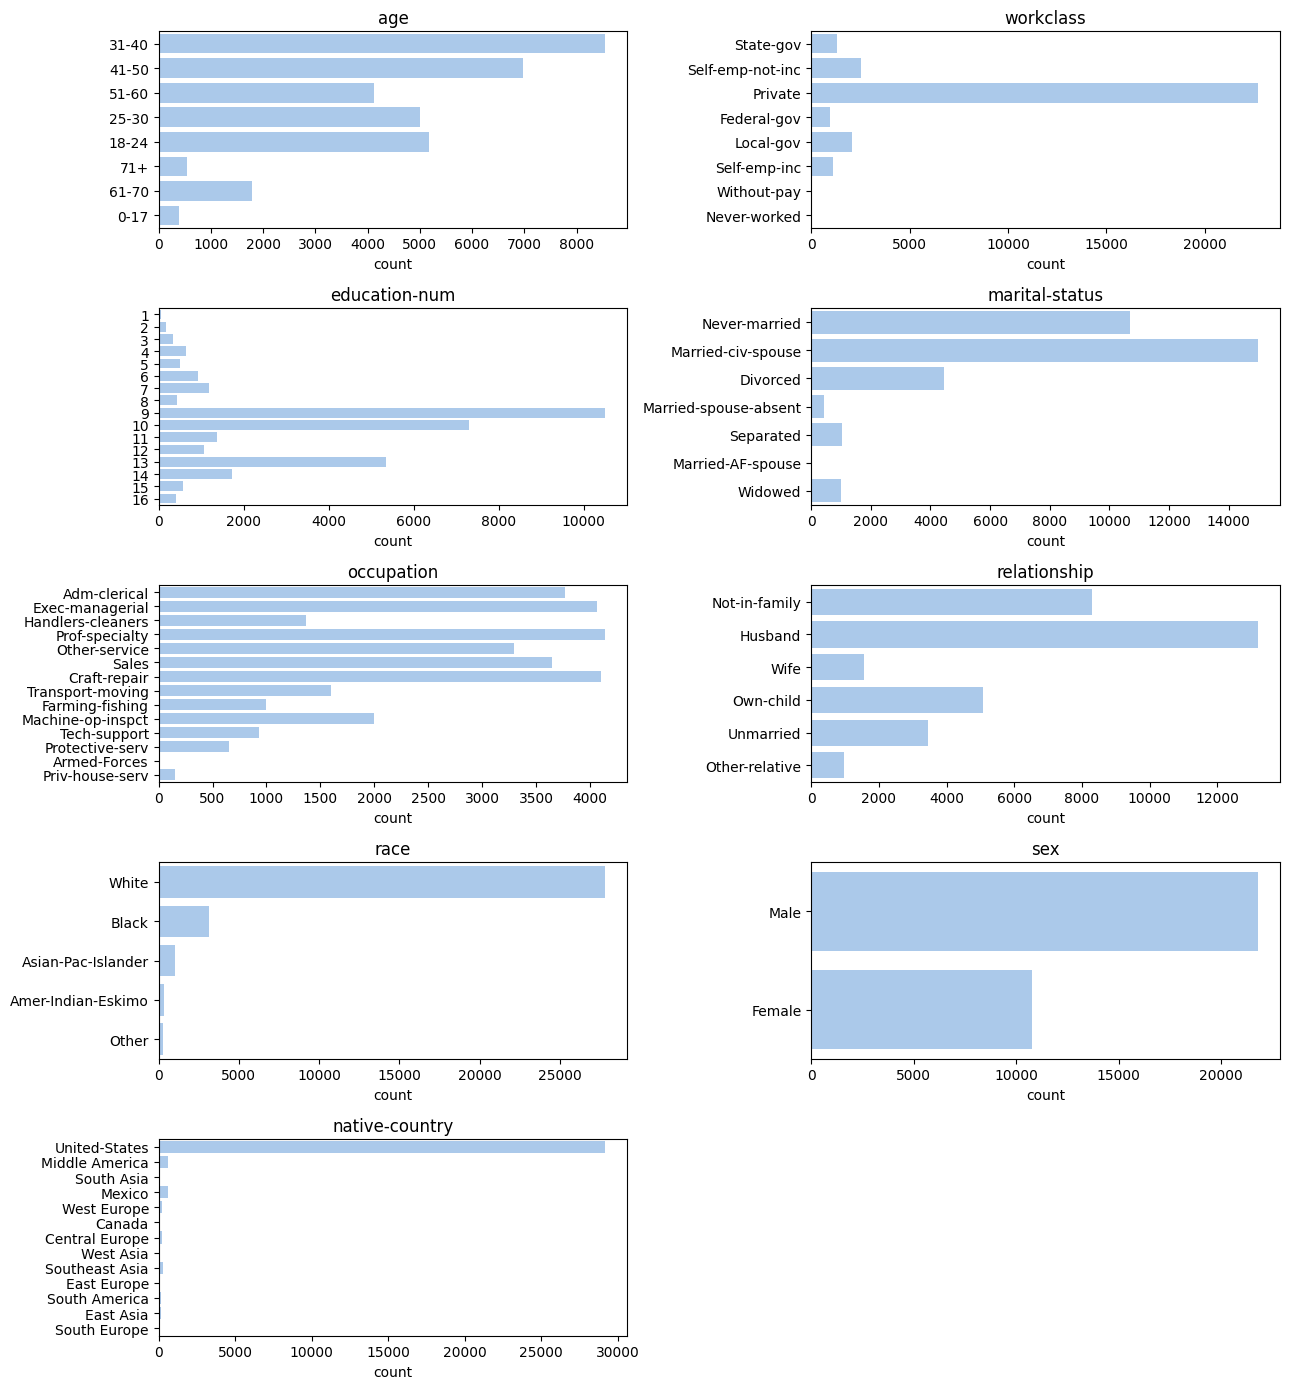

In [38]:
categorical_features = ['age','workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
plt.figure(figsize=(13, 14))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df, y=feature)       # can do stat="percent"
    plt.title(feature)
    plt.ylabel(None)
plt.tight_layout()
plt.show()

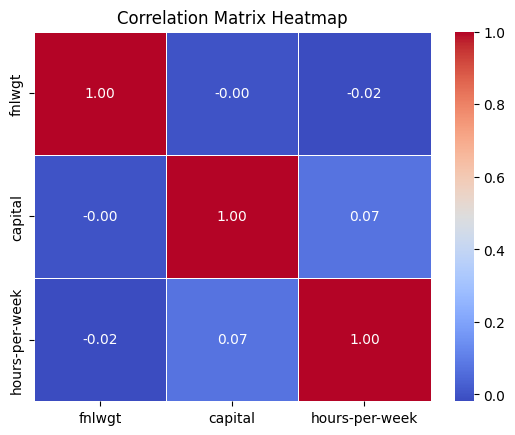

In [39]:
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

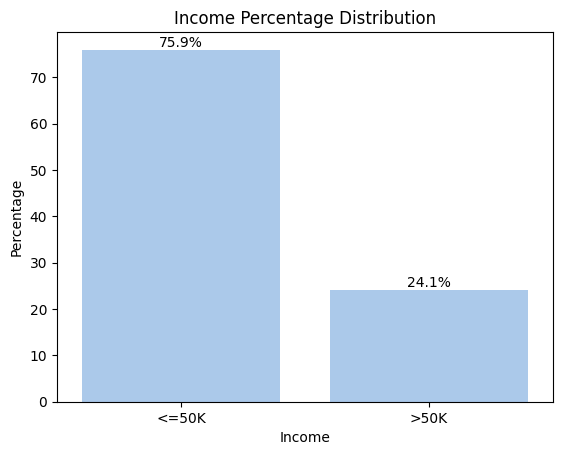

In [40]:
ax = sns.countplot(data=df, x="income", stat="percent")
plt.ylabel("Percentage")
plt.xlabel("Income")
plt.title("Income Percentage Distribution")


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

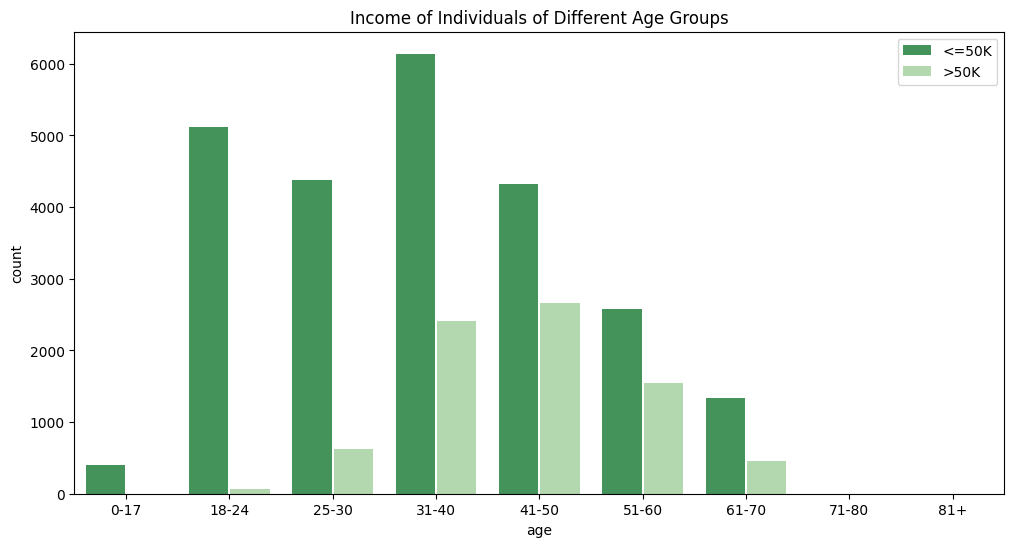

In [41]:
labels_age = ['0-17','18-24','25-30','31-40','41-50','51-60','61-70','71-80','81+']
count_compare_plot(df, column="age", compare_column="income", order=labels_age)

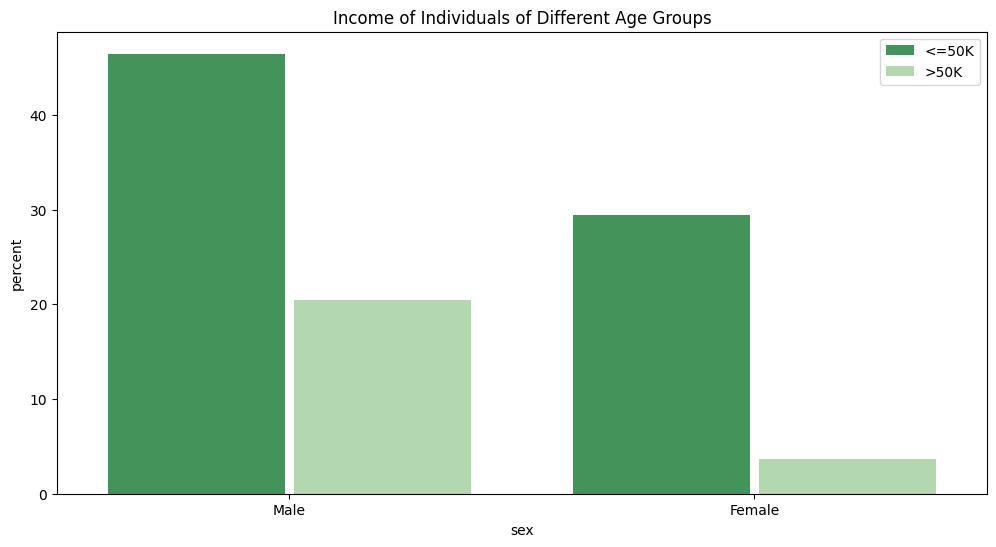

In [42]:
count_compare_plot(df, column="sex", compare_column="income", stat="percent")

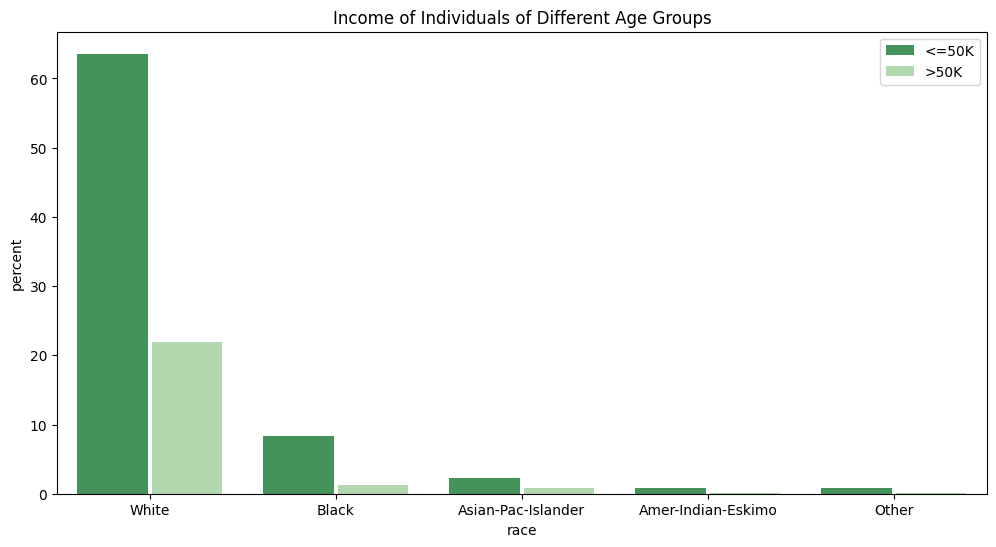

In [43]:
count_compare_plot(df, column="race", compare_column="income", stat="percent")

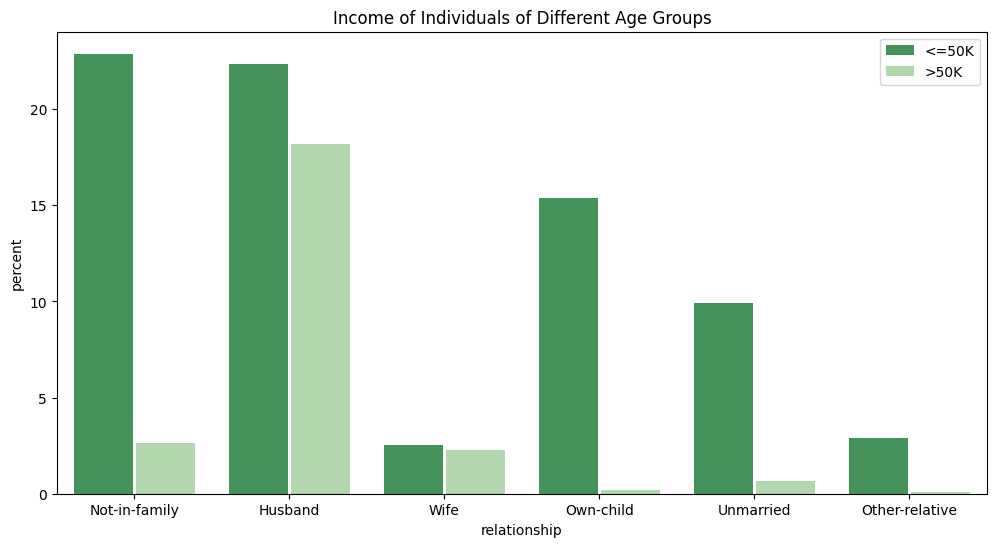

In [44]:
count_compare_plot(df, column="relationship", compare_column="income", stat="percent")

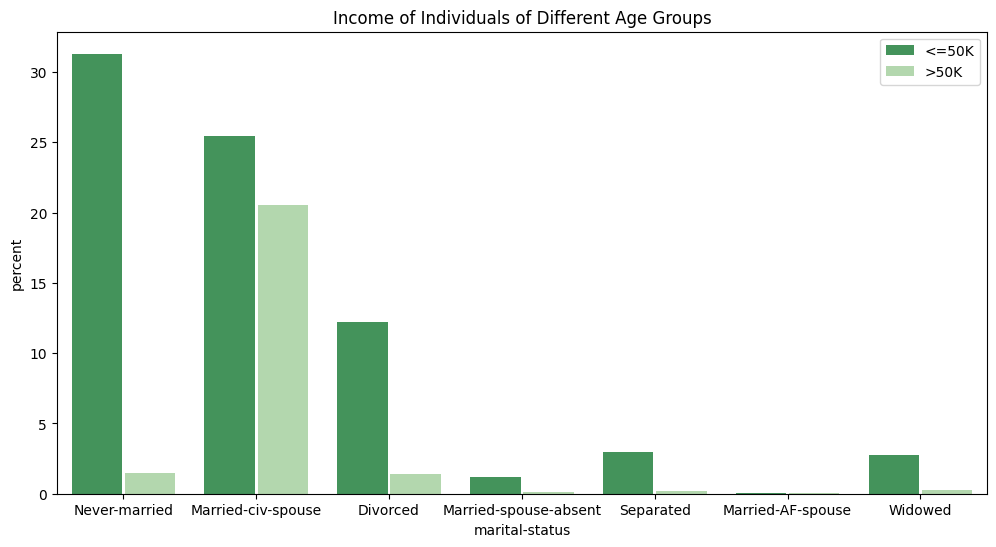

In [45]:
count_compare_plot(df, column="marital-status", compare_column="income", stat="percent")

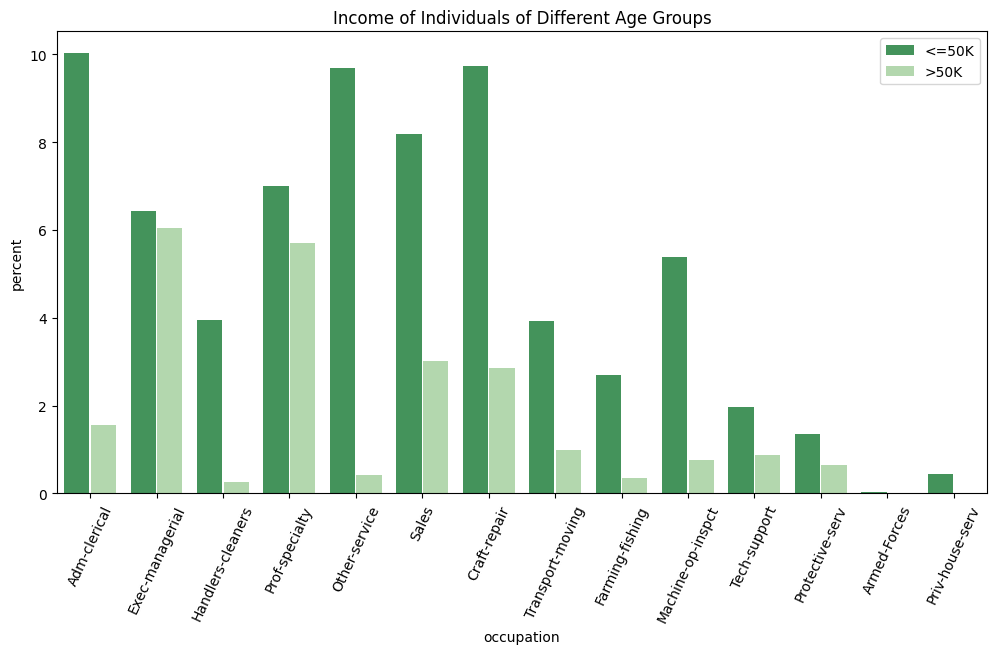

In [46]:
count_compare_plot(df, column="occupation", compare_column="income", stat="percent", rotation=65)

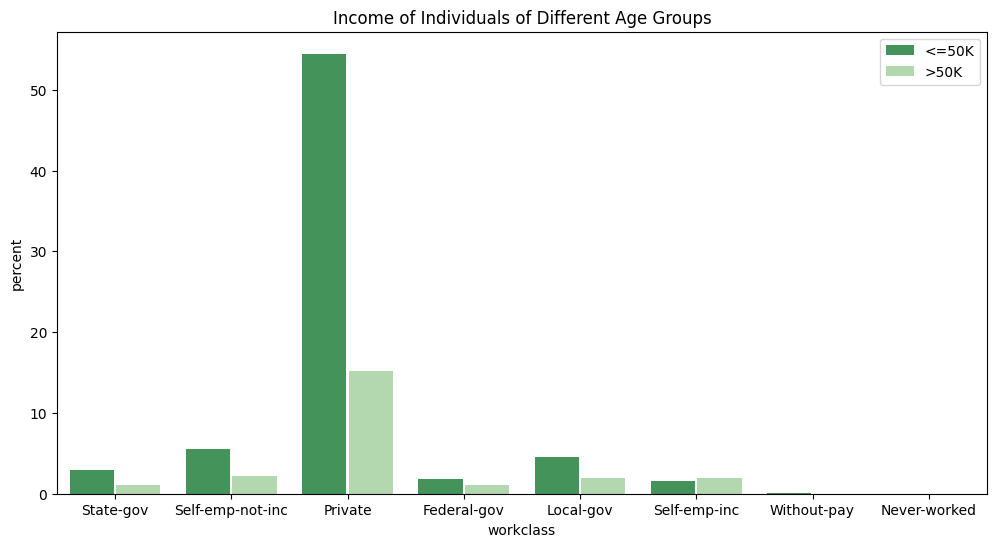

In [47]:
count_compare_plot(df, column="workclass", compare_column="income", stat="percent")

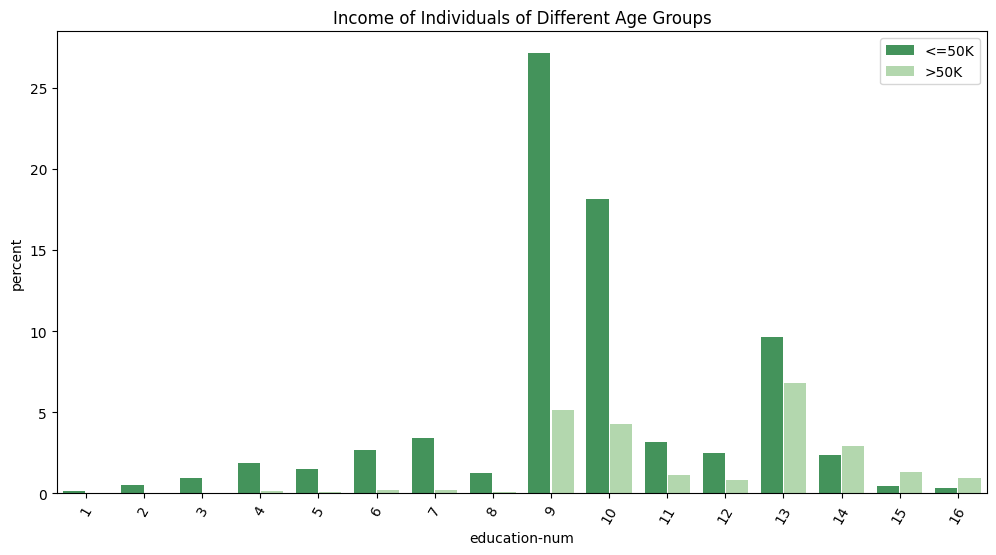

In [48]:
count_compare_plot(df, column="education-num", compare_column="income", stat="percent", rotation=60)

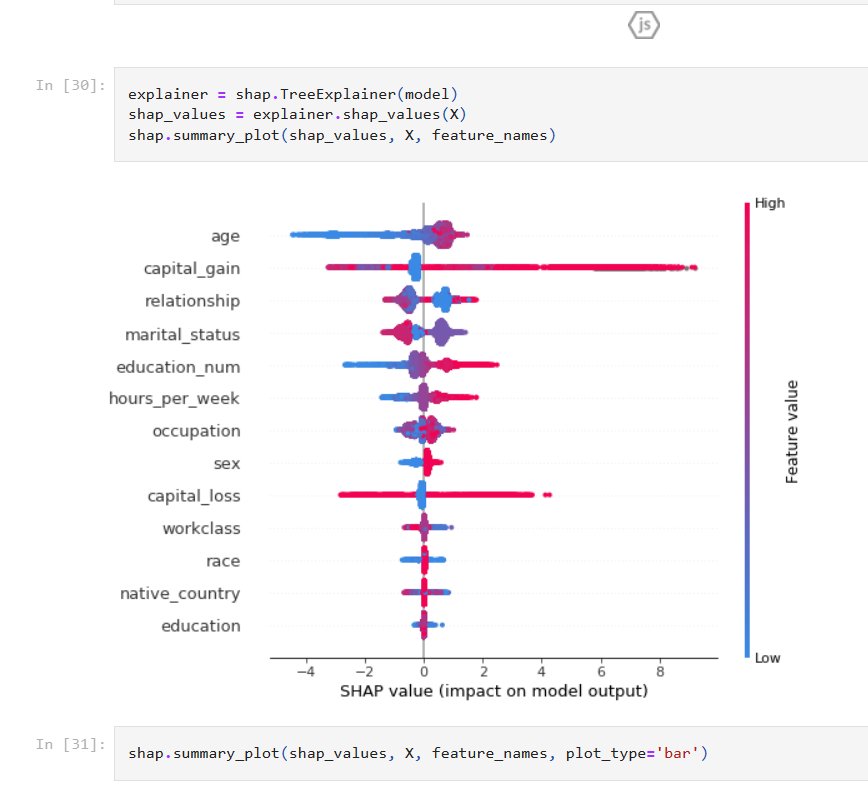